In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

data = pd.read_csv('spotify-2023.csv')

colunas_regressao = [
    'streams', 
    'valence_%', 
    'danceability_%', 
    'energy_%', 
    'acousticness_%', 
    'bpm', 
    'in_spotify_playlists', 
]

data = data[colunas_regressao]

data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

media = data.mean(axis=0)

data.fillna(media, inplace=True)

def realizar_regressao_simples(x, y, titulo, titulox, tituloy):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r2 = r_value**2
    
    # Criando o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, slope * x + intercept, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    plt.title(titulo)
    plt.xlabel(titulox)
    plt.ylabel(tituloy)
    plt.legend()
    
    plt.text(0.05, 0.95, f'Correlação de Pearson (r): {r_value:.4f}\nCoeficiente de Determinação (R²): {r2:.4f}',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()
    
    return r_value, r2

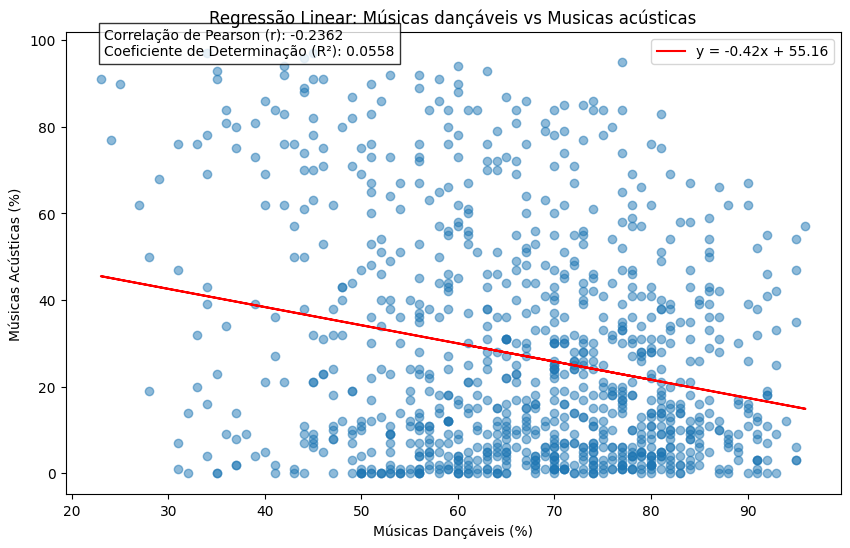

In [12]:
r1, r2_1 = realizar_regressao_simples(data['danceability_%'], data['acousticness_%'], 
                                    'Regressão Linear: Músicas dançáveis vs Musicas acústicas', 'Músicas Dançáveis (%)', 'Músicas Acústicas (%)')

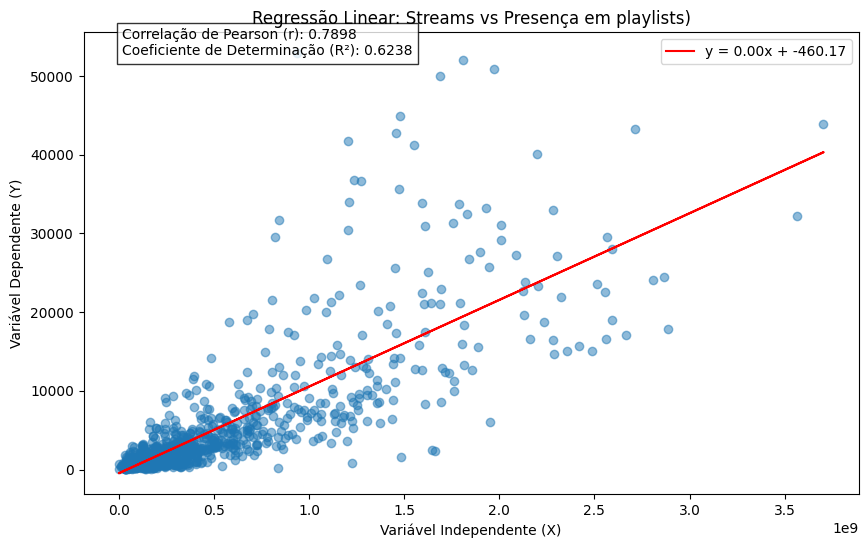

In [4]:
# 2. Experiência vs Salário
r2, r2_2 = realizar_regressao_simples(data['streams'], data['in_spotify_playlists'],
                                    'Regressão Linear: Streams vs Presença em playlists)', 'Streams', 'Presença em playlists')

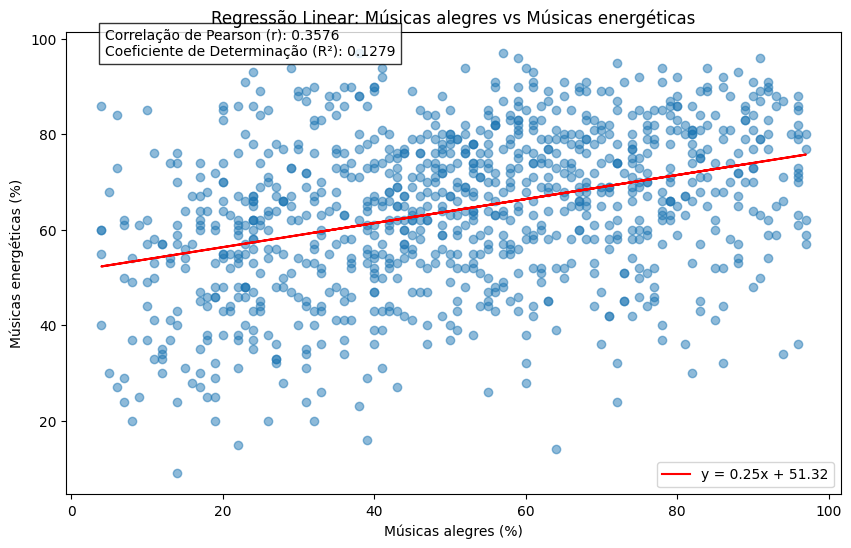

In [13]:
r3, r2_3 = realizar_regressao_simples(data['valence_%'], data['energy_%'],
                                    'Regressão Linear: Músicas alegres vs Músicas energéticas', 'Músicas alegres (%)', 'Músicas energéticas (%)')

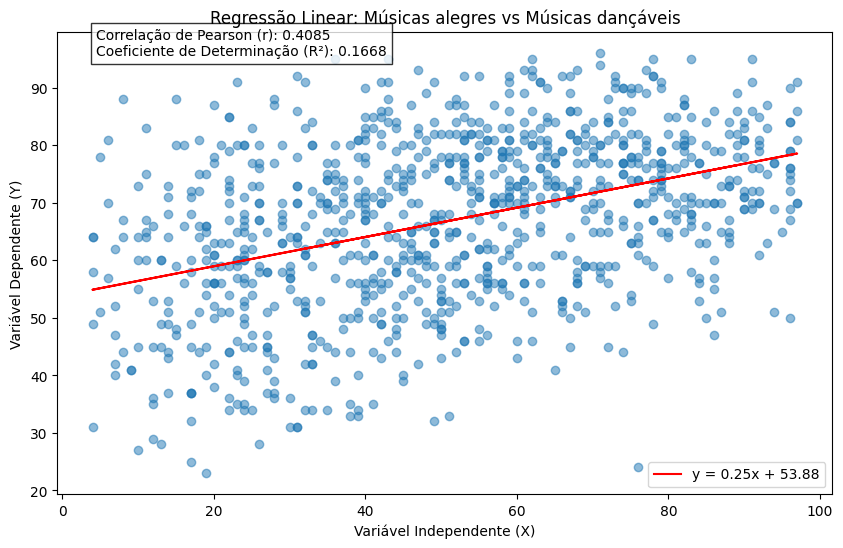

In [6]:
# 4. Horas de Trabalho vs Salário
r4, r2_4 = realizar_regressao_simples(data['valence_%'], data['danceability_%'],
                                    'Regressão Linear: Músicas alegres vs Músicas dançáveis', 'Músicas alegres (%)', 'Músicas dançáveis (%)')

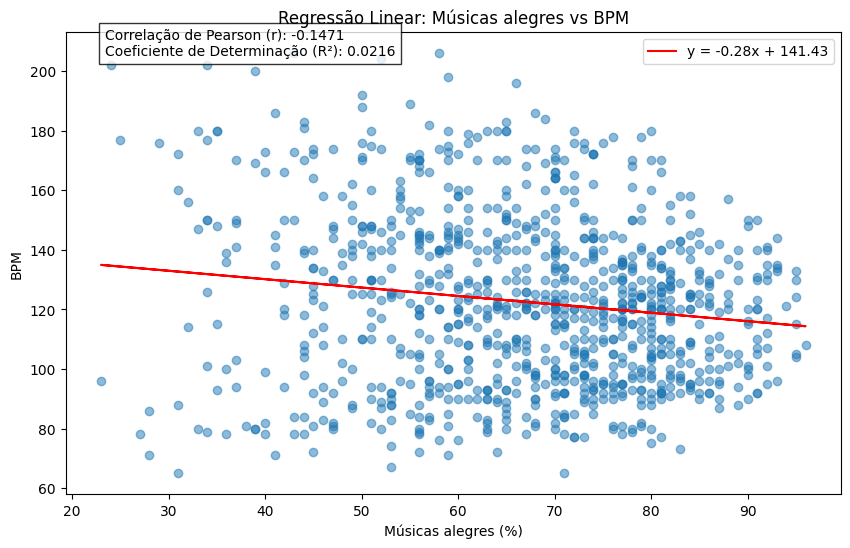

In [14]:
# 5. Satisfação vs Salário
r5, r2_5 = realizar_regressao_simples(data['danceability_%'], data['bpm'],
                                    'Regressão Linear: Músicas alegres vs BPM', 'Músicas alegres (%)', 'BPM')

In [15]:
X = data[['danceability_%', 'energy_%', 'valence_%', 'in_spotify_playlists', 'bpm']]
y = data['streams']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("\nRegressão múltipla:")
print(model.summary().tables[1])
print(f"\nR² ajustado: {model.rsquared_adj:.4f}")

while True:
    p_values = model.pvalues[1:]  # Excluding constant
    var_menos_significativa = p_values.idxmax()
    max_pvalue = p_values.max()
        
    if max_pvalue <= 0.05:
        print("\nTodas as variáveis são significativas (p-valor <= 0.05)")
        break

    print(f"\nVariável menos significativa: {var_menos_significativa} (p-valor: {max_pvalue:.4f})")
        
    for nome, pvalor in p_values.sort_values().items():
        print(f"{nome}: {pvalor:.4f}")
    
    X = X.drop(columns=[var_menos_significativa])
    
    model = sm.OLS(y, X).fit()
    print("\nRegressão após remoção da váriavel menos significativa:")
    print(model.summary().tables[1])
    print(f"\nNovo R² ajustado: {model.rsquared_adj:.4f}")
    
    if len(X.columns) <= 2:  # Only constant and one variable left
        print("\nApenas uma variável restante.")
        break


Regressão múltipla:
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.218e+08   8.58e+07      3.752      0.000    1.54e+08     4.9e+08
danceability_%       -3.136e+05   8.64e+05     -0.363      0.717   -2.01e+06    1.38e+06
energy_%             -1.731e+06    7.3e+05     -2.371      0.018   -3.16e+06   -2.98e+05
valence_%            -6.413e+04   5.55e+05     -0.116      0.908   -1.15e+06    1.02e+06
in_spotify_playlists  5.673e+04   1435.657     39.517      0.000    5.39e+04    5.96e+04
bpm                   2.682e+05   4.08e+05      0.657      0.511   -5.33e+05    1.07e+06

R² ajustado: 0.6249

Variável menos significativa: valence_% (p-valor: 0.9080)
in_spotify_playlists: 0.0000
energy_%: 0.0179
bpm: 0.5113
danceability_%: 0.7166
valence_%: 0.9080

Regressão após remoção da váriavel menos significativa:
                           coef